# Kernel Learning - KLDA 

### LDA 구현
1. J(w) = $\frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}$ 을 최소화하는 w값 찾기 
- J(w) = $\frac{w^TS_Bw}{w^TS_ww}$  

> $S_B = (m_2-m_1)(m_2-m_1)^T$

> $S_w = \sum_{n \in C_1}(x_n - m_1)(x_n - m_1)^T + \sum_{n \in C_2} (x_n -m_2)(x_n - m_2)^T$

- $w = S_w^{-1} \frac{\beta}{\alpha} (m_2 - m_1)$ 

> $\beta = (m_2 - m_1)^T w$ (스칼라 값)

> $\alpha = \frac{w^TS_Bw}{w^TS_ww}$ (스칼라 값) 

2. Projection 한 값 y(x) 찾기
- $y(x) = wx$

### KLDA 구현 
1. Kernel 함수 도입하기. 이후 J(w)를 최대화하는 $\alpha$를 찾기 

- J(w) = $\frac{w^TS_B^{\phi}w}{w^TS_w^{\phi}w}$   = $\frac{\alpha^TM\alpha}{\alpha^TN\alpha}$ 

> $w = \sum_{n=1}^N \alpha_n\phi(x_n), \alpha \in R$

> $S_B = (m_2^{\phi}-m_1^{\phi})(m_2^{\phi}-m_1^{\phi})^T$

> $M = S_B$

> $S_w = \sum_{n \in C_1}(\phi(x_n) - m_1^{\phi})(\phi(x_n^i) - m_1^{\phi})^T + \sum_{n \in C_2} (\phi(x_n) -m_2^{\phi})(\phi(x_n) - m_2^{\phi})^T$

> $N = \sum_{j=1,2} K_j(I - 1_{N_j})K_j^T$ 

- $\alpha = N^{-1}(M_2 - M_1)$

2. Projection 한 값 y(x) 찾기 
- $y(x) = (w * \phi(x)) = \sum_{n=1}^N \alpha_nK(x_n,x)$


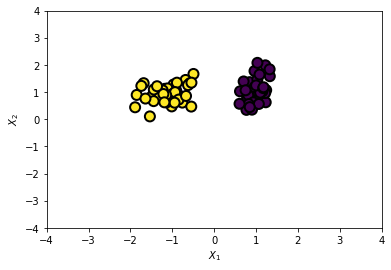

In [1]:
# 데이터 사용 및 라이브러리 설치 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification 

X, y = make_classification(n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)

X1 = X[y==0]
X2 = X[y==1]

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### LDA 구현
1. J(w) = $\frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}$ 을 최소화하는 w값 찾기 
- J(w) = $\frac{w^TS_Bw}{w^TS_ww}$  

> $S_B = (m_2-m_1)(m_2-m_1)^T$

> $S_w = \sum_{n \in C_1}(x_n - m_1)(x_n - m_1)^T + \sum_{n \in C_2} (x_n -m_2)(x_n - m_2)^T$

- $w = S_w^{-1} \frac{\beta}{\alpha} (m_2 - m_1)$ 

> $\beta = (m_2 - m_1)^T w$ (스칼라 값)

> $\alpha = \frac{w^TS_Bw}{w^TS_ww}$ (스칼라 값) 

2. Projection 한 값 y(x) 찾기
- $y(x) = wx$


**구현해야하는 것** 
- $m_i :\frac{1}{N_1}\sum_{n\in C_i} x_n$
- $S_B, S_w,S_w^{-1}$ 

- $\beta : (m_2 - m_1)^T w $   (스칼라 값)
- $\alpha : \frac{w^TS_Bw}{w^TS_ww}$ (스칼라 값) 

**필요한 것**
- $x_1, x_2$ 
- $m_1, m_2$

**함수의 형태**
- def __init__(self, X1, X2)
- def make_s(self) : => $S_b, S_w, S_w^{-1}$


In [49]:
class LDA() : 
    
    def __init__(self,X1, X2) : 
        self.X1 = X1
        self.n1 = np.shape(X1)[0]
        self.m1 = np.shape(X1)[1]
        self.m_X1 = np.array(X1).mean(axis=0)
        
        self.X2 = X2 
        self.n2 = np.shape(X2)[0]
        self.m2 = np.shape(X2)[1]
        self.m_X2 = np.array(X2).mean(axis =0)
        
        self.sb, self.sw, self.sw_inv = self.make_s()
        
    def make_s(self) : 
        sb = (self.m_X1 - self.m_X2).reshape(-1,1)@(self.m_X1 - self.m_X2).reshape(1,-1)
        sw = np.zeros((self.m1, self.m2))
        for i in range(self.n1) : 
            sw += (np.array(self.X1)[i] - self.m1).reshape(-1,1) @ (np.array(self.X1)[i]-self.m1).reshape(1,-1)
        for j in range(self.n2) : 
            sw += (np.array(self.X2)[j] - self.m2).reshape(-1,1) @ (np.array(self.X2)[i] - self.m2).reshape(1,-1)
        sw_inv = np.linalg.inv(sw)
        return sb, sw, sw_inv 
    
    def find_w(self) :
        w_pre = self.sw_inv @ (self.m_X1 - self.m_X2).reshape(-1,1) 
        a = (w_pre.T @ self.sb @ w_pre) / (w_pre.T @ self.sw @ w_pre)
        w = a * w_pre 
        return w 
        
        

In [52]:
test = LDA(X1, X2) 
test.find_w()

array([[ 0.00040679],
       [-0.00081508]])

In [21]:
np.array(X1).mean(axis=0)

array([ 1.00450058, -0.94482014])

In [39]:
a = np.array([1,2])

b = a.reshape(1,-1)
c = a.reshape(-1,1)
print(c @ b)

[[1 2]
 [2 4]]


### KLDA 구현
1. $J(w)의 값을 최소화하는 w, \alpha 값 찾기$
J(w) = $\frac{w^TS_B^{\phi}w}{w^TS_w^{\phi}w}$   = $\frac{\alpha^TM\alpha}{\alpha^TN\alpha}$ 

> $w = \sum_{n=1}^N \alpha_n\phi(x_n), \alpha \in R$

> $w^TS_Bw = w^T(m_2^{\phi}-m_1^{\phi})(m_2^{\phi}-m_1^{\phi})^Tw$ 

> = $\alpha^T M\alpha = \alpha^T(\mu_2 - \mu_1)(\mu_2 - \mu_1)^T\alpha$

> $N = \sum_{j=1,2} K_j(I - 1_{N_j})K_j^T$ 

- $\alpha = N^{-1}(\mu_2 - \mu_1)$

2. Projection 한 값 y(x) 찾기 
- $y(x) = (w * \phi(x)) = \sum_{n=1}^N \alpha_nK(x_n,x)$

**구현해야하는 것** 
- $N = \sum_{j=1,2} K_j(I - 1_{N_j})K_j^T$ 
- $\mu_2 - \mu_1$
> $(\mu_i)_n = \frac{1}{N_i}\sum_{k=1}^{N_i}K(x_n, x_k^i)$


**필요한 것**
- $K_1, K_2$ 
- $\mu_1, \mu_2$
- Kernel 함수 

**함수의 형태**
- def __init__(self, X1, X2, K)
- def kernel_fn(self, x_i, x_j, kernel = None, coef, degree, gamma) : => 커낼 함수 반환 
- def make_n(self) : => $N, N^{-1} $
- def mu(self) : => $\mu_1, \mu_2 $ 
- def make_a(self)


In [16]:
class KLDA() : 
    
    def __init__(self,X1, X2, kernel) : 
        self.X1 = X1
        self.n1 = np.shape(X1)[0]
        self.m1 = np.shape(X1)[1]
        
        self.X2 = X2 
        self.n2 = np.shape(X2)[0]
        self.m2 = np.shape(X2)[1]
        
        self.kernel = kernel 
        self.k_matrix1, self.k_matrix2 = self.kernel_matrix()
        self.alpha = self.make_a()
        
    def kernel_fn(self, x_i, x_j, kernel = None, coef = 1.0, degree = 3, gamma = 0.1) : 
        if kernel == "poly" : 
            return (np.dot(x_i, x_j) + coef)** degree 
        
        elif kernel == "RBF" : 
            return np.exp(- np.sum(np.square(x_i - x_j)) * gamma)
        
        elif kernel == "sig" : 
            return np.tanh(np.dot(x_i, x_j) + coef) 
        
        else : 
            return np.dot(x_i, x_j) 
        
    def kernel_matrix (self) : 
        k_matrix1 = np.zeros((self.n1, self.n1))
        k_matrix2 = np.zeros((self.n2, self.n2))
        for i in range(self.n1) : 
            for j in range(self.n1) :
                k_matrix1[i,j] = self.kernel_fn(self.X1[i], self.X1[j], self.kernel)
        
        for i in range(self.n2) : 
            for j in range(self.n2) : 
                k_matrix2[i,j] = self.kernel_fn(self.X2[i], self.X2[j], self.kernel)
        
        return k_matrix1, k_matrix2 
    
                
    def make_n(self) : 
        n_matrix = np.zeros((self.n1, self.n1))
        n_matrix = n_matrix + self.k_matrix1 @ (np.identity(self.n1) - (np.ones((self.n1, self.n1))/self.n1)) @ self.k_matrix1.T 
        n_matrix = n_matrix + self.k_matrix2 @ (np.identity(self.n2) - (np.ones((self.n2, self.n2))/self.n2)) @ self.k_matrix2.T
        return n_matrix
        
    
    def mu(self) : 
        mu_1 = self.k_matrix1.sum(axis=1).T
        mu_2 = self.k_matrix2.sum(axis=1).T
        
        return mu_1, mu_2 
    
    def make_a(self) : 
        n_matrix = self.make_n() 
        n_matrix_inv = np.linalg.inv(n_matrix)
        mu_1, mu_2 = self.mu()
        return n_matrix_inv @ (mu_2 - mu_1) 
    
    def projection(self,x, X) : 
        y = np.sum([self.alpha[i]* self.kernel_fn(X[i], x, kernel = self.kernel) for i in range(len(X))])
        return y
        
    def projection_matrix(self) : 
        matrix_1 = [] 
        matrix_2 = [] 
        for i in range(len(X1)) : 
            matrix_1.append(self.projection(X1[i], X1))
        
        for j in range(len(X2)) : 
            matrix_2.append(self.projection(X2[j], X2))
        
        return matrix_1, matrix_2     

    def classify(self,x) : 
        range_1 = [min(self.project_matrix1), max(self.project_matrix1)]
        range_2 = [min(self.project_matrix2), max(self.project_matrix2)]
        
        p_x = [self.projection(x, X1), self.projection(x, X2)]
        if min(self.project_matrix1) <= p_x[0] <= max(self.project_matrix1) : 
            return 0
        
        if min(self.project_matrix2) <= p_x[1] <= max(self.project_matrix1) : 
            return 1
        
        else : 
            print("Wait Second :). It's looks like abnormal")
        

In [22]:
test = KLDA(X1, X2, "")
x=  [0.8780991 , 0.89551051]
#a = test.projection_matrix()
a = test.inv_projection_matrix() 

print(max(a[0]), min(a[0]))
print(max(a[1]), min(a[1]))


78.00258683271966 6.825372878468599
-0.9341153636802346 -5.526608062523579


In [5]:
X1

array([[0.8780991 , 0.89551051],
       [0.95928819, 1.03967316],
       [0.82178321, 1.18947778],
       [0.77151441, 0.345716  ],
       [1.17456965, 0.69211449],
       [0.82798737, 0.84806927],
       [0.89189141, 0.87699465],
       [0.90394545, 0.35413361],
       [0.94459507, 1.12641981],
       [0.9317172 , 0.78344054],
       [1.32970299, 1.58463774],
       [1.01313574, 1.16777676],
       [1.22382712, 1.98519313],
       [0.96435056, 1.77547698],
       [1.02600767, 0.87226739],
       [1.10863359, 1.16755486],
       [0.91588404, 0.79032389],
       [1.13872896, 0.85729649],
       [0.84917607, 1.36586461],
       [1.03436581, 2.07582971],
       [1.24328724, 1.07258847],
       [0.84146721, 0.89891716],
       [1.06821044, 0.77370361],
       [0.90852604, 0.96703727],
       [1.0576549 , 0.97139534],
       [0.99854519, 0.68188934],
       [1.23187251, 0.62567337],
       [1.32551412, 1.838294  ],
       [0.88239331, 0.70017571],
       [1.03345052, 1.46893146],
       [1.